# Product Recommendation System in Python



In [1]:
!wget https://www.dropbox.com/s/vs37kzooeof6krt/ratings_Beauty.csv?dl=0

--2022-06-21 13:02:55--  https://www.dropbox.com/s/vs37kzooeof6krt/ratings_Beauty.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vs37kzooeof6krt/ratings_Beauty.csv [following]
--2022-06-21 13:02:56--  https://www.dropbox.com/s/raw/vs37kzooeof6krt/ratings_Beauty.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa1443ac374f02df24c9d6c5ae.dl.dropboxusercontent.com/cd/0/inline/BnqwiiZNlUPXHRMj99U2kkrNzBSwkMQH0bCzojWOC1SZCBqtKI_SGpveLMFQXPPq0eKvz7LGfVqAnAWsxJgcns_WRtIBISiBETc03BiMv6GPIib4pwv1tZ98VofdUfLalsqEshc35e0ga8TbGwZgRe-OYIIzi_0roEeego0iCGdk_w/file# [following]
--2022-06-21 13:02:56--  https://ucaa1443ac374f02df24c9d6c5ae.dl.dropboxusercontent.com/cd/0/inline/BnqwiiZNlUPXHRMj99U2kkrNzBSwkMQH0bCzojWOC1SZC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ratings_Beauty.csv?dl=0")
print("Number of Products in the dataset : ",df.shape[0])

Number of Products in the dataset :  2023070


In [3]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


Number of Unique Ratings available :  5
Count of each ratings is :  [183784, 113034, 169791, 307740, 1248721]


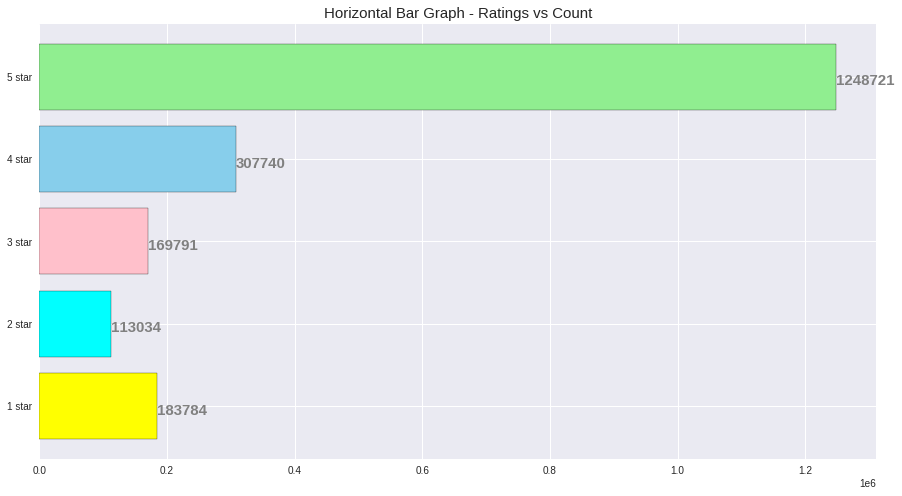

In [4]:
count_ratings = [0 for i in range(len(np.unique(df['Rating'])))]
print("Number of Unique Ratings available : ",len(count_ratings))

for i in range(df.shape[0]):
  count_ratings[int(df['Rating'][i]-1)]+=1

print("Count of each ratings is : ",count_ratings)

plt.style.use('seaborn')

labels = ["1 star" , "2 star", "3 star", 
          "4 star", "5 star"]

plt.figure(figsize=(15,8),facecolor="w")
ax = plt.barh(labels,count_ratings,
        color=["yellow","cyan","pink",
               "skyblue","lightgreen"],
        edgecolor="black")

for i in ax.patches:
    plt.text(i.get_width()+0.6, i.get_y()+0.3,
             str(round((i.get_width()), 4)),
             fontsize=15, fontweight='bold',
             color='grey')
  
plt.title("Horizontal Bar Graph - Ratings vs Count",fontsize=15)
plt.show()

In [5]:
df_4 = df[df['Rating']==4.0]
df_5 = df[df['Rating']==5.0]
df_45 = pd.concat([df_4, df_5])

<Figure size 1080x576 with 0 Axes>

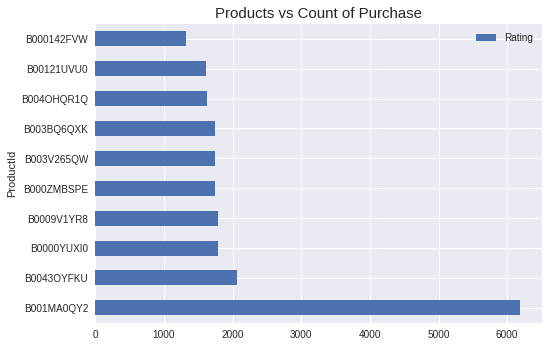

In [6]:
popular_products = pd.DataFrame(df_45.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)[:10]

plt.figure(figsize=(15,8),facecolor="w")
most_popular.head(30).plot(kind = "barh")

plt.title("Products vs Count of Purchase",fontsize=15)
plt.show()

<Figure size 1080x576 with 0 Axes>

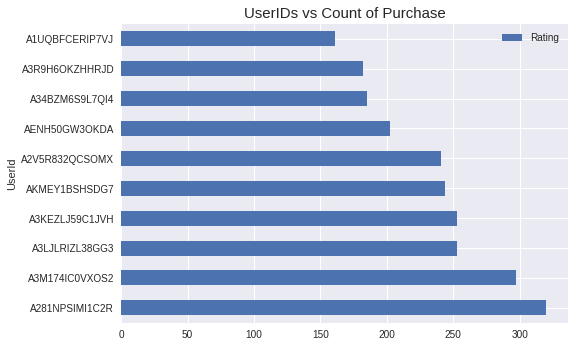

In [7]:
popular_users = pd.DataFrame(df_45.groupby('UserId')['Rating'].count())
most_popular_users = popular_users.sort_values('Rating', ascending=False)[:10]

plt.figure(figsize=(15,8),facecolor="w")
most_popular_users.head(30).plot(kind = "barh")

plt.title("UserIDs vs Count of Purchase",fontsize=15)
plt.show()